# FiveThirtyEight Comic Characters Dataset

# Data downloaded from https://www.kaggle.com/fivethirtyeight/fivethirtyeight-comic-characters-dataset

# Importing Python Packages

In [2]:
%matplotlib inline
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as st
from mpl_toolkits import mplot3d

# Detective Comics Exploratory Data Analysis

Reading dc-wikia-data csv file

identifying data types and null values from each variables

Dropping rows where null values are in Year and ALIVE variables or columns

Identify null values in each variable before filling or replacing null values

Converting and replacing missing values in YEAR column from float64 to int64

Converting and replacing missing values with mean in APPEARANCES and from float64 to int64

In [3]:
dcwikia = pd.read_csv('dc-wikia-data.csv')
print('Detective Comics data types')
print('')
print(dcwikia.dtypes)
print('...............................................................................................')
dcwikia1= dcwikia.dropna(subset=['YEAR'])
dcwikia1= dcwikia1.dropna(subset=['ALIVE'])
print("Detective Comics numbers of rows before and after dropping null values from variable or column")
print('')
print("Before dropping null values: ",len(dcwikia))
print("After dropping null values: ",len(dcwikia1))
print('Total ',len(dcwikia)-len(dcwikia1),' rows are dropped')
print("Before updating null values : ",dcwikia.shape,"After updating null values : ",dcwikia1.shape)
print('...............................................................................................')
print('Detective Comics total null values count')
print('')
print(dcwikia1.isnull().sum())

Detective Comics data types

page_id               int64
name                 object
urlslug              object
ID                   object
ALIGN                object
EYE                  object
HAIR                 object
SEX                  object
GSM                  object
ALIVE                object
APPEARANCES         float64
FIRST APPEARANCE     object
YEAR                float64
dtype: object
...............................................................................................
Detective Comics numbers of rows before and after dropping null values from variable or column

Before dropping null values:  6896
After dropping null values:  6824
Total  72  rows are dropped
Before updating null values :  (6896, 13) After updating null values :  (6824, 13)
...............................................................................................
Detective Comics total null values count

page_id                0
name                   0
urlslug                0
ID      

# Detective Comics Data Cleaning and Mining

Converting or filling missing values in ID as No Identity

Converting or filling missing values in ALIGN as Side Characters

Converting or filling missing values in EYE as Natural Eyes

Converting or filling missing values in HAIR as Natural Hair

Converting or filling missing values in SEX as Gender Characters

Deleting GSM column because it has lot of blanks and which can be replaced with any charater

Split FIRST APPEARANCE in Month and dropped or delete FIRST APPERANCE column

Deleting urlslug column

Converting or filling missing values in Month as December

After fill null values and deleting GSM and FIRST APPEARANCE columns, checking how many number of Rows and Columns are their

Verifying are they still any null values in dataframe

Verifying data types of each variable

Identifying unique values from related variables in data frame

In [4]:
#dcwikia1['YEAR']=dcwikia1['YEAR'].replace("",0).fillna(0).astype(np.int64)
dcwikia1['YEAR']=dcwikia1['YEAR'].astype(np.int64)
#dcwikia12=dcwikia1[dcwikia1['APPEARANCES'].isnull()]
a = dcwikia1['APPEARANCES'].mean()
dcwikia1['APPEARANCES']=dcwikia1['APPEARANCES'].fillna(a)
#dcwikia1[dcwikia1['page_id']==289378]
dcwikia1['APPEARANCES']=dcwikia1['APPEARANCES'].astype(np.int64)
print('Detective Comics data types are converted float64 to int64')
print('')
print(dcwikia1.dtypes)
print('...............................................................................................')
dcwikia1['ID']=dcwikia1['ID'].fillna('Missing Identity')
dcwikia1['ALIGN']=dcwikia1['ALIGN'].fillna('Side Characters')
dcwikia1['EYE']=dcwikia1['EYE'].fillna('Natural Eyes')
dcwikia1['HAIR']=dcwikia1['HAIR'].fillna('Natural Hair')
dcwikia1['SEX']=dcwikia1['SEX'].fillna('Gender Characters')
del dcwikia1['GSM']
mfa=dcwikia1['FIRST APPEARANCE'].str.split(" ",n=1,expand=True)
dcwikia1['Month']=mfa[1]
del dcwikia1['FIRST APPEARANCE'] 
del dcwikia1['urlslug']
dcwikia1['Month']=dcwikia1['Month'].fillna('December')
dcwikia1['Month'] = np.where(dcwikia1['Month'] == 'January' ,1 ,np.where(dcwikia1['Month'] == 'February' ,2 ,np.where(dcwikia1['Month'] == 'March' ,3,np.where(dcwikia1['Month'] == 'April' ,4,np.where(dcwikia1['Month'] == 'May' ,5,np.where(dcwikia1['Month'] == 'June' ,6,np.where(dcwikia1['Month'] == 'July' ,7,np.where(dcwikia1['Month'] == 'August' ,8,np.where(dcwikia1['Month'] == 'September' ,9,np.where(dcwikia1['Month'] == 'October' ,10,np.where(dcwikia1['Month'] == 'November' ,11,np.where(dcwikia1['Month'] == 'December' ,12,0))))))))))))
print('Detective Comics shape after data mining')
print('')
print(dcwikia1.shape)
print('...............................................................................................')
print('Detective Comics null values count after data mining')
print('')
print(dcwikia1.isnull().sum())
print('...............................................................................................')
print('Detective Comics data types values after data mining')
print('')
print(dcwikia1.dtypes)
print('...............................................................................................')
print('Detective Comics unique values after data mining')
print('')
for i in dcwikia1[['ID','ALIGN','EYE','HAIR','SEX','ALIVE','YEAR','Month']]:
    print(i," : ",dcwikia1[i].unique())
    print("")

Detective Comics data types are converted float64 to int64

page_id              int64
name                object
urlslug             object
ID                  object
ALIGN               object
EYE                 object
HAIR                object
SEX                 object
GSM                 object
ALIVE               object
APPEARANCES          int64
FIRST APPEARANCE    object
YEAR                 int64
dtype: object
...............................................................................................
Detective Comics shape after data mining

(6824, 11)
...............................................................................................
Detective Comics null values count after data mining

page_id        0
name           0
ID             0
ALIGN          0
EYE            0
HAIR           0
SEX            0
ALIVE          0
APPEARANCES    0
YEAR           0
Month          0
dtype: int64
............................................................................

In [5]:
dcwikia1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
page_id,6824.0,147033.405041,108243.959510,1380.0,43236.0,140596.0,212837.25,404010.0
APPEARANCES,6824.0,23.747362,85.526405,1.0,3.0,7.0,19.00,3093.0
YEAR,6824.0,1989.767585,16.826560,1935.0,1983.0,1992.0,2003.00,2013.0
Month,6824.0,6.711460,3.488909,0.0,4.0,7.0,10.00,12.0


In [6]:
dcwikia1.corr()

,page_id,APPEARANCES,YEAR,Month
page_id,1.000000,-0.233649,0.255950,0.029605
APPEARANCES,-0.233649,1.000000,-0.246001,-0.019128
YEAR,0.255950,-0.246001,1.000000,0.035751
Month,0.029605,-0.019128,0.035751,1.000000


# Detective Comics Data Visualization

Text(0.5,1,'Detective Comics Dataframe heatmap')

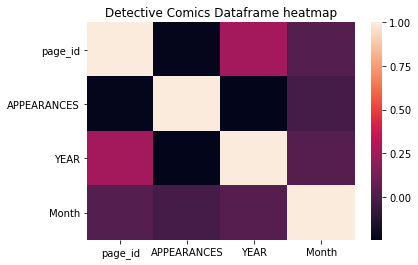

In [7]:
#plt.subplots(figsize=(20,15))
sns.heatmap(dcwikia1.corr()).set_title('Detective Comics Dataframe heatmap')

Text(0.5,1,'Detective Comics Year and Appearances')

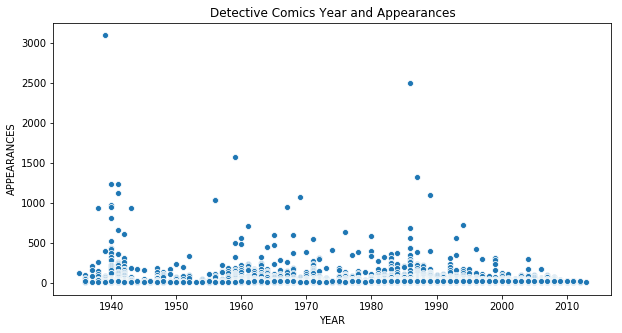

In [8]:
# sns.set()
# sns.set_style('ticks')
# fig, ax = plt.subplots()
# fig.set_size_inches(11.7, 8.27)
plt.subplots(figsize=(10,5))
sns.scatterplot(dcwikia1.YEAR,dcwikia1.APPEARANCES,marker='o').set_title('Detective Comics Year and Appearances')

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78]),
 <a list of 79 Text xticklabel objects>)

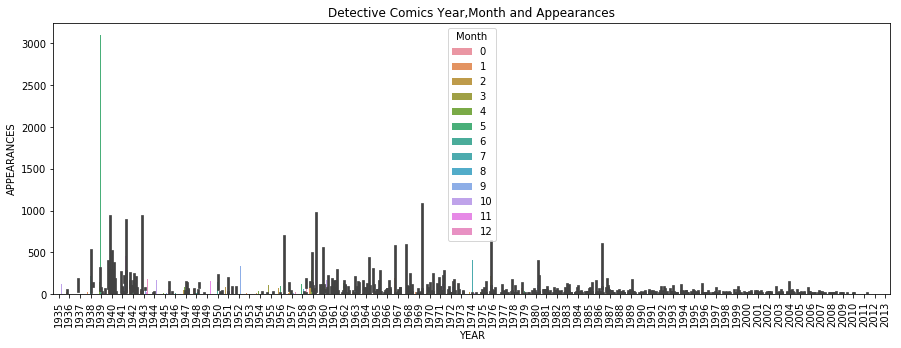

In [9]:
# sns.set()
# sns.set_style('ticks')
# fig, ax = plt.subplots()
# fig.set_size_inches(11.7, 8.27)
plt.subplots(figsize=(15,5))
sns.barplot(dcwikia1.YEAR,dcwikia1.APPEARANCES,hue=dcwikia1['Month']).set_title('Detective Comics Year,Month and Appearances')
# leg = plt.legend(title="Title")
# leg._legend_box.align = "left"
#ax.legend(loc='best')
plt.xticks(rotation=90)
#plt.savefig('y.jpg')

In [10]:
#sns.jointplot(x="YEAR", y='APPEARANCES', data=dcwikia1,kind='kde',hue="ID")

Text(0.5,1,'Detective Comics Year amd Appearances by ID')

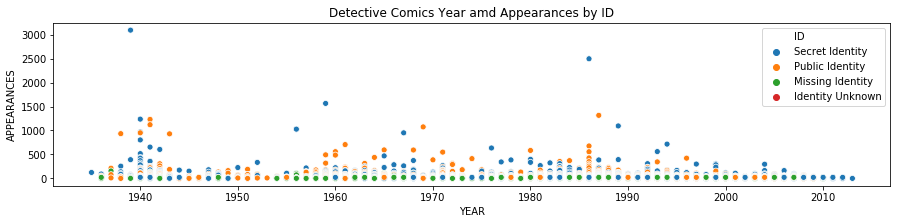

In [11]:
# sns.set_style('ticks')
# fig, ax = plt.subplots()
# fig.set_size_inches(11.7, 8.27)
plt.subplots(figsize=(15,3))
sns.scatterplot(dcwikia1.YEAR,dcwikia1.APPEARANCES,hue=dcwikia1['ID']).set_title('Detective Comics Year amd Appearances by ID')

Text(0.5,1,'Detective Comics Year and Appearances by ALIGN')

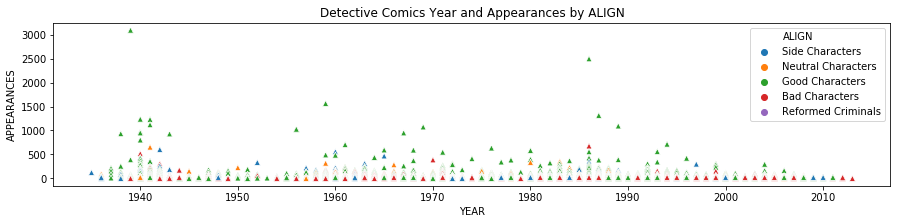

In [12]:
# sns.set_style('ticks')
# fig, ax = plt.subplots()
# fig.set_size_inches(11.7, 8.27)
plt.subplots(figsize=(15,3))
sns.scatterplot(dcwikia1.YEAR,dcwikia1.APPEARANCES,hue=dcwikia1['ALIGN'],marker='^',alpha=1).set_title('Detective Comics Year and Appearances by ALIGN')

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Detective Comics ID and APPEARANCES by ALIGN')

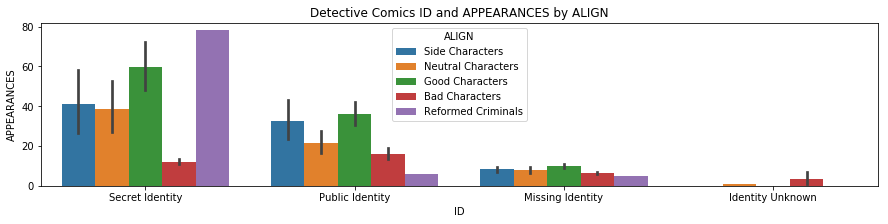

In [13]:
plt.subplots(figsize=(15,3))
sns.barplot(dcwikia1.ID,dcwikia1.APPEARANCES,hue=dcwikia1['ALIGN']).set_title('Detective Comics ID and APPEARANCES by ALIGN')

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text xticklabel objects>)

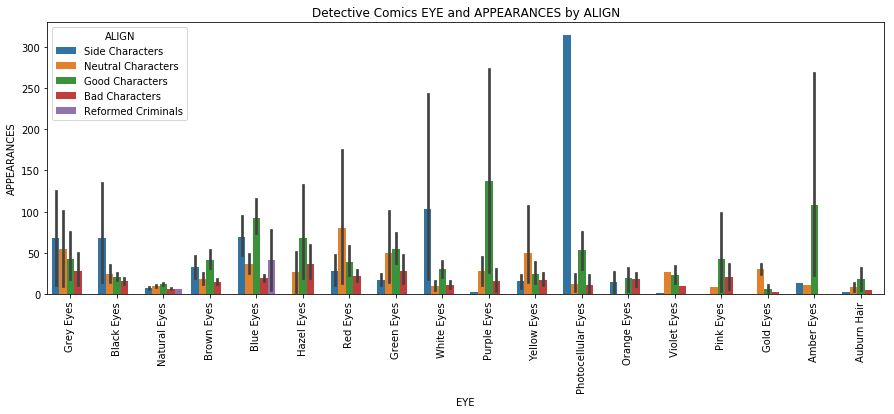

In [14]:
plt.subplots(figsize=(15,5))
sns.barplot(dcwikia1.EYE,dcwikia1.APPEARANCES,hue=dcwikia1['ALIGN']).set_title('Detective Comics EYE and APPEARANCES by ALIGN')
plt.xticks(rotation=90)

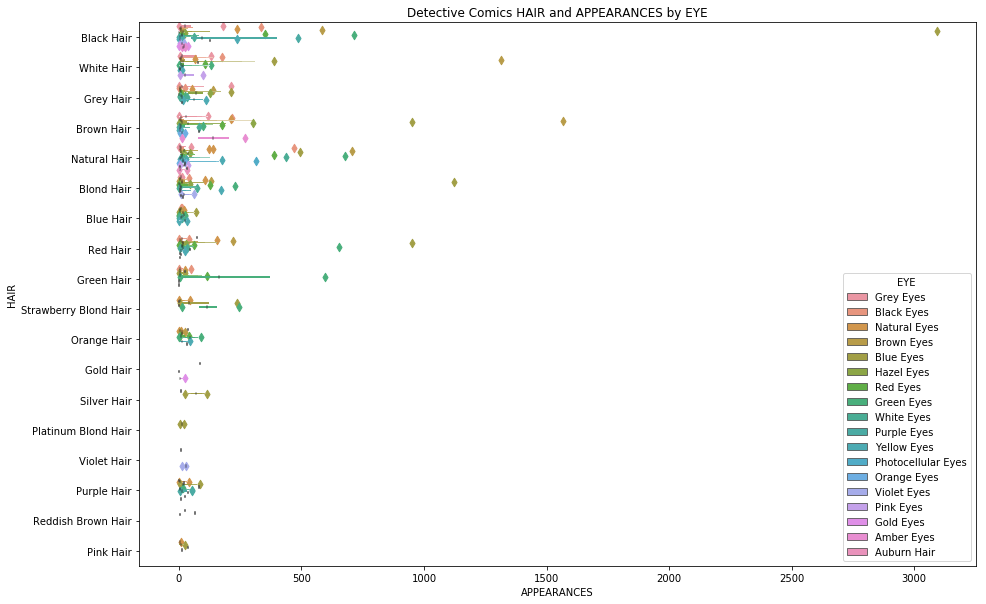

In [16]:
#sns.boxenplot(x="APPEARANCES", y="EYE",color="b", hue="HAIR",data=dcwikia1)
plt.subplots(figsize=(15,10))
sns.boxenplot(x="APPEARANCES", y="HAIR",data=dcwikia1,hue=dcwikia1['EYE']).set_title('Detective Comics HAIR and APPEARANCES by EYE')
plt.show()
#plt.savefig('d.jpg')

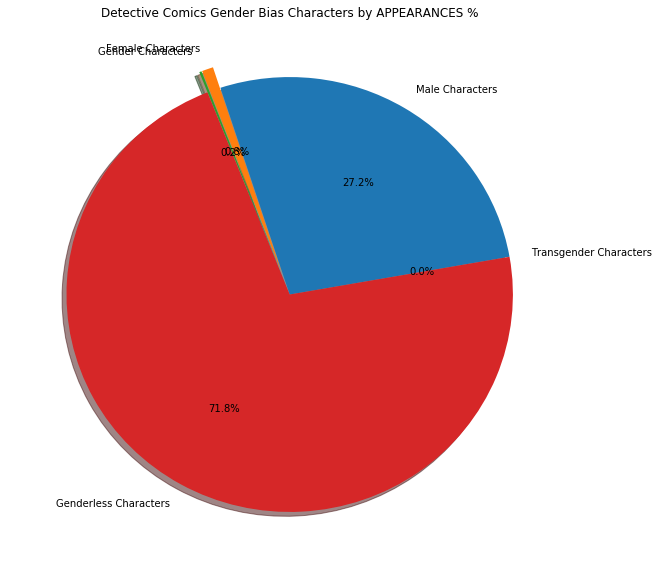

In [17]:
#plt.rc("font", size=10)
z = dcwikia1['SEX'].unique()
y = dcwikia1.groupby(['SEX'])['APPEARANCES'].sum().reset_index()
explode = (0, 0.1,0.1, 0, 0) 
#fig1,ax1=plt.subplots()
plt.figure(figsize=(10,10))
plt.pie(y.APPEARANCES, labels=z, explode= explode,autopct='%1.1f%%', shadow=True, startangle=10)
plt.title('Detective Comics Gender Bias Characters by APPEARANCES %')
plt.show()

#plt.savefig('country.png')

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

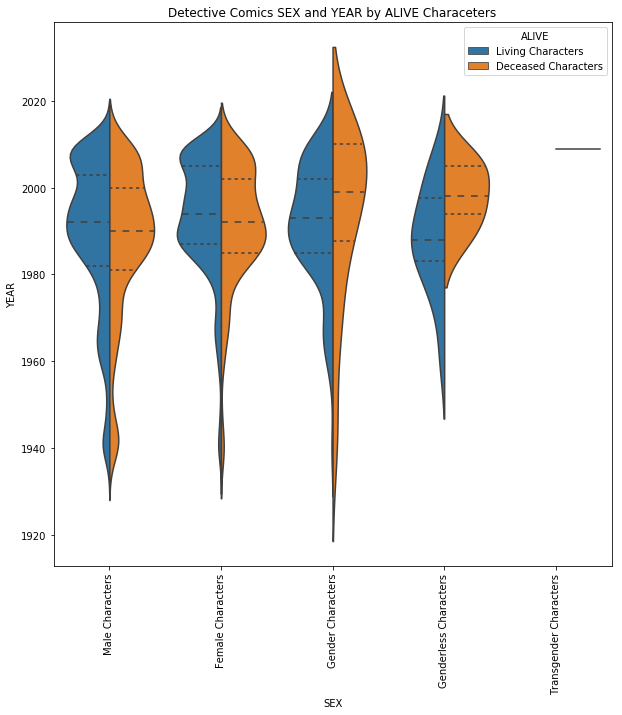

In [18]:
plt.figure(figsize=(10,10))
sns.violinplot(x="SEX", y="YEAR", hue=dcwikia1['ALIVE'],split=True, inner="quart",data=dcwikia1).set_title('Detective Comics SEX and YEAR by ALIVE Characeters')
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

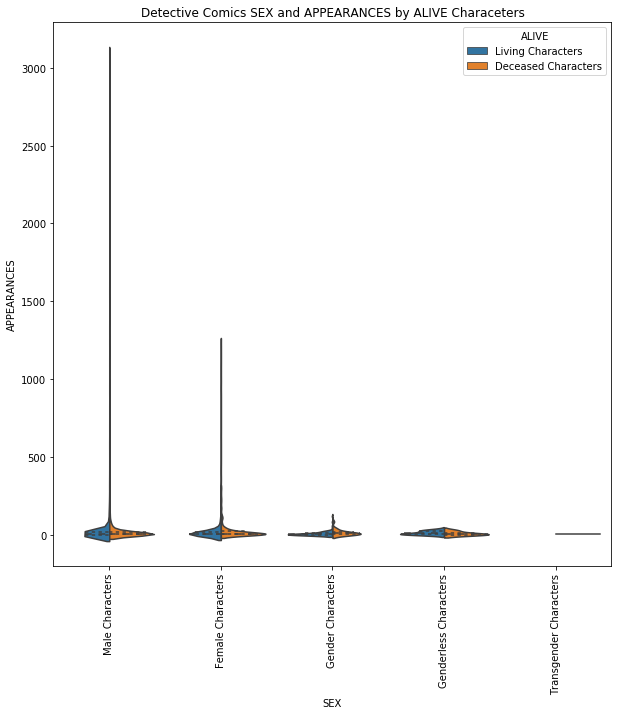

In [19]:
plt.figure(figsize=(10,10))
sns.violinplot(x="SEX", y="APPEARANCES", hue=dcwikia1['ALIVE'],split=True, inner="quart",data=dcwikia1).set_title('Detective Comics SEX and APPEARANCES by ALIVE Characeters')
plt.xticks(rotation=90)

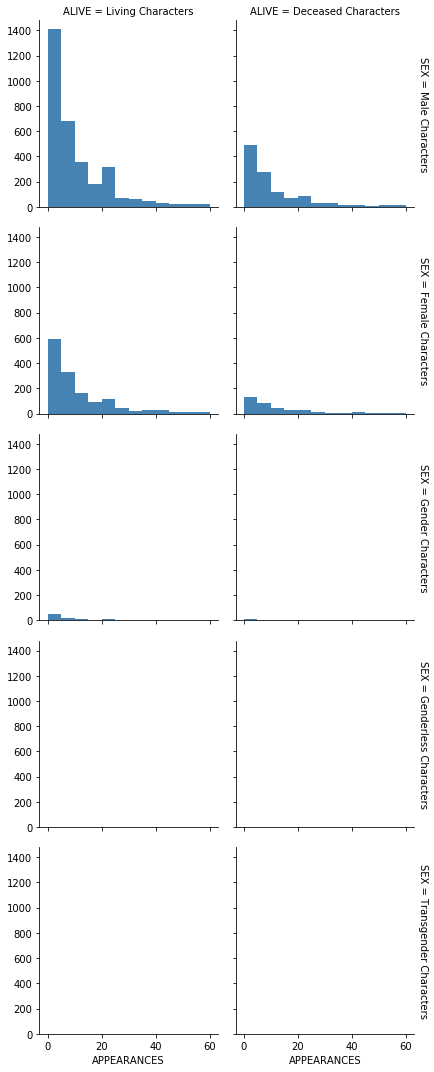

In [20]:
g = sns.FacetGrid(dcwikia1, row="SEX", col="ALIVE", margin_titles=True)
bins = np.linspace(0, 60, 13)
g.map(plt.hist, "APPEARANCES", color="steelblue", bins=bins)

Text(0.5,0.92,'Detective Comics Month,YEAR and APPEARANCES')

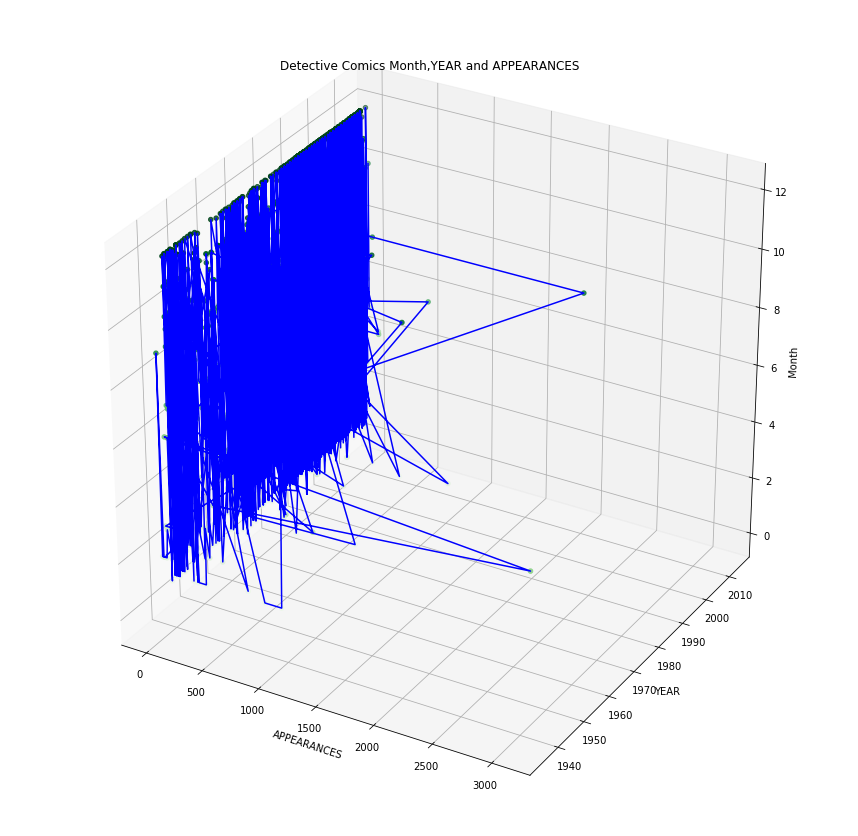

In [21]:
fig = plt.figure(figsize=(15,15))
ax = plt.axes(projection='3d')
xdata = dcwikia1['APPEARANCES']
ydata = dcwikia1['YEAR']
zdata = dcwikia1['Month']
ax.plot3D(xdata, ydata, zdata, 'blue')
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens',);
ax.set_xlabel('APPEARANCES')
ax.set_ylabel('YEAR')
ax.set_zlabel('Month')
plt.title('Detective Comics Month,YEAR and APPEARANCES')

# Marvel Exploratory Data Analysis

In [23]:
mcwikia = pd.read_csv('marvel-wikia-data.csv')
print('Marvel data types')
print(' ')
print(mcwikia.dtypes)
print('...............................................................................................')
mcwikia1= mcwikia.dropna(subset=['Year'])
mcwikia1= mcwikia1.dropna(subset=['ALIVE'])
print("Marvel numbers of rows before and after dropping null values from variable or column")
print(' ')
print("Before dropping null values: ",len(mcwikia))
print("After dropping null values: ",len(mcwikia1))
print('Total ',len(mcwikia)-len(mcwikia1),' rows are dropped')
print("Before updating null values : ",mcwikia.shape,"After updating null values : ",mcwikia1.shape)
print('...............................................................................................')
print('Marvel total null values count')
print(' ')
print(mcwikia1.isnull().sum())

Marvel data types
 
page_id               int64
name                 object
urlslug              object
ID                   object
ALIGN                object
EYE                  object
HAIR                 object
SEX                  object
GSM                  object
ALIVE                object
APPEARANCES         float64
FIRST APPEARANCE     object
Year                float64
dtype: object
...............................................................................................
Marvel numbers of rows before and after dropping null values from variable or column
 
Before dropping null values:  16376
After dropping null values:  15561
Total  815  rows are dropped
Before updating null values :  (16376, 13) After updating null values :  (15561, 13)
...............................................................................................
Marvel total null values count
 
page_id                 0
name                    0
urlslug                 0
ID                   3602
A

# Marvel Data Cleaning and Mining

Converting or filling missing values in ID as No Identity

Converting or filling missing values in ALIGN as Side Characters

Converting or filling missing values in EYE as Natural Eyes

Converting or filling missing values in HAIR as Natural Hair

Converting or filling missing values in SEX as Gender Characters

Deleting GSM column because it has lot of blanks and which can be replaced with any charater

Split FIRST APPEARANCE in Month and dropped or delete FIRST APPERANCE column

Deleting urlslug column

After fill null values and deleting GSM and FIRST APPEARANCE columns, checking how many number of Rows and Columns are their

Verifying are they still any null values in dataframe

Verifying data types of each variable

Identifying unique values from related variables in data frame

In [24]:
#mcwikia1['Year']=mcwikia1['Year'].replace("",0).fillna(0).astype(np.int64)
mcwikia1['Year']=mcwikia1['Year'].astype(np.int64)
#mcwikia12=mcwikia1[mcwikia1['APPEARANCES'].isnull()]
a = mcwikia1['APPEARANCES'].mean()
mcwikia1['APPEARANCES']=mcwikia1['APPEARANCES'].fillna(a)
mcwikia1['APPEARANCES']=mcwikia1['APPEARANCES'].astype(np.int64)
print('Marvel data types are converted float64 to int64')
print(' ')
print(mcwikia1.dtypes)
print('...............................................................................................')
mcwikia1['ID']=mcwikia1['ID'].fillna('Missing Identity')
mcwikia1['ALIGN']=mcwikia1['ALIGN'].fillna('Side Characters')
mcwikia1['EYE']=mcwikia1['EYE'].fillna('Natural Eyes')
mcwikia1['HAIR']=mcwikia1['HAIR'].fillna('Natural Hair')
mcwikia1['SEX']=mcwikia1['SEX'].fillna('Gender Characters')
del mcwikia1['GSM']
ma=mcwikia1['FIRST APPEARANCE'].str.split("-",n=3,expand=True)
mcwikia1['Month']=ma[0]
del mcwikia1['FIRST APPEARANCE'] 
del mcwikia1['urlslug']
mcwikia1['Month'].isnull().sum()
#mcwikia1['Month']=mcwikia1['Month'].fillna('December')
mcwikia1['Month'] = np.where(mcwikia1['Month'] == 'Jan' ,1 ,np.where(mcwikia1['Month'] == 'Feb' ,2 ,np.where(mcwikia1['Month'] == 'Mar' ,3,np.where(mcwikia1['Month'] == 'Apr' ,4,np.where(mcwikia1['Month'] == 'May' ,5,np.where(mcwikia1['Month'] == 'Jun' ,6,np.where(mcwikia1['Month'] == 'Jul' ,7,np.where(mcwikia1['Month'] == 'Aug' ,8,np.where(mcwikia1['Month'] == 'Sep' ,9,np.where(mcwikia1['Month'] == 'Oct' ,10,np.where(mcwikia1['Month'] == 'Nov' ,11,12)))))))))))
#mcwikia1['Month'].value_counts()
print('Marvel shape after data mining')
print(' ')
print(mcwikia1.shape)
print('...............................................................................................')
print('Marvel null values count after data mining')
print(' ')
print(mcwikia1.isnull().sum())
print('...............................................................................................')
print('Marvel data types values after data mining')
print(' ')
print(mcwikia1.dtypes)
print('...............................................................................................')
print('Marvel unique values after data mining')
print(' ')
for i in mcwikia1[['ID','ALIGN','EYE','HAIR','SEX','ALIVE','Year','Month']]:
    print(i," : ",mcwikia1[i].unique())
    print("")

Marvel data types are converted float64 to int64
 
page_id              int64
name                object
urlslug             object
ID                  object
ALIGN               object
EYE                 object
HAIR                object
SEX                 object
GSM                 object
ALIVE               object
APPEARANCES          int64
FIRST APPEARANCE    object
Year                 int64
dtype: object
...............................................................................................
Marvel shape after data mining
 
(15561, 11)
...............................................................................................
Marvel null values count after data mining
 
page_id        0
name           0
ID             0
ALIGN          0
EYE            0
HAIR           0
SEX            0
ALIVE          0
APPEARANCES    0
Year           0
Month          0
dtype: int64
...............................................................................................
Marvel

In [25]:
mcwikia1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
page_id,15561.0,289960.311355,248774.592817,1025.0,26841.0,273384.0,502038.0,755278.0
APPEARANCES,15561.0,17.339374,94.343898,1.0,1.0,3.0,11.0,4043.0
Year,15561.0,1984.951803,19.663571,1939.0,1974.0,1990.0,2000.0,2013.0
Month,15561.0,6.718913,3.469964,1.0,4.0,7.0,10.0,12.0


In [27]:
mcwikia1.corr()

,page_id,APPEARANCES,Year,Month
page_id,1.000000,-0.150919,-0.050244,-0.014526
APPEARANCES,-0.150919,1.000000,-0.081093,0.005551
Year,-0.050244,-0.081093,1.000000,-0.017772
Month,-0.014526,0.005551,-0.017772,1.000000


# Marvel Data Visualization

Text(0.5,1,'Marvel Dataframe heatmap')

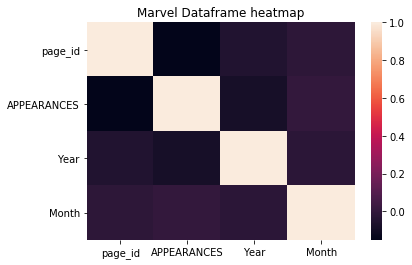

In [29]:
#plt.subplots(figsize=(20,15))
sns.heatmap(mcwikia1.corr()).set_title('Marvel Dataframe heatmap')

Text(0.5,1,'Marvel Year and Appearances')

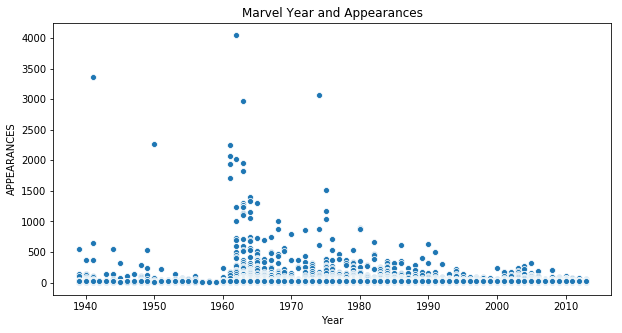

In [30]:
# sns.set()
# sns.set_style('ticks')
# fig, ax = plt.subplots()
# fig.set_size_inches(11.7, 8.27)
plt.subplots(figsize=(10,5))
sns.scatterplot(mcwikia1.Year,mcwikia1.APPEARANCES,marker='o').set_title('Marvel Year and Appearances')

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74]), <a list of 75 Text xticklabel objects>)

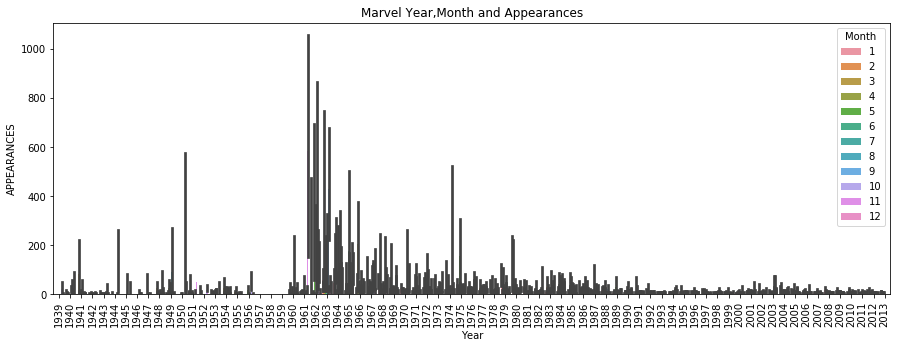

In [31]:
# sns.set()
# sns.set_style('ticks')
# fig, ax = plt.subplots()
# fig.set_size_inches(11.7, 8.27)
plt.subplots(figsize=(15,5))
sns.barplot(mcwikia1.Year,mcwikia1.APPEARANCES,hue=mcwikia1['Month']).set_title('Marvel Year,Month and Appearances')
plt.xticks(rotation=90)
#plt.savefig('y.jpg')

Text(0.5,1,'Marvel Year amd Appearances by ID')

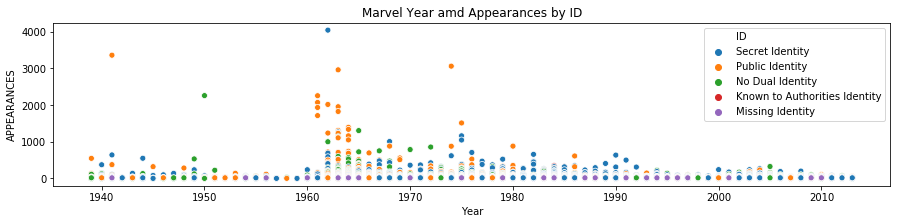

In [32]:
# sns.set_style('ticks')
# fig, ax = plt.subplots()
# fig.set_size_inches(11.7, 8.27)
plt.subplots(figsize=(15,3))
sns.scatterplot(mcwikia1.Year,mcwikia1.APPEARANCES,hue=mcwikia1['ID']).set_title('Marvel Year amd Appearances by ID')

Text(0.5,1,'Marvel Year and Appearances by ALIGN')

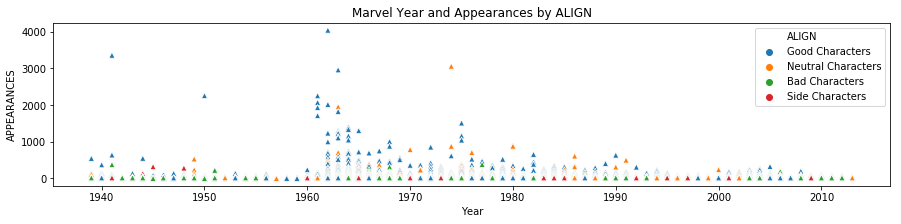

In [33]:
# sns.set_style('ticks')
# fig, ax = plt.subplots()
# fig.set_size_inches(11.7, 8.27)
plt.subplots(figsize=(15,3))
sns.scatterplot(mcwikia1.Year,mcwikia1.APPEARANCES,hue=mcwikia1['ALIGN'],marker='^',alpha=1).set_title('Marvel Year and Appearances by ALIGN')


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Marvel ID and APPEARANCES by ALIGN')

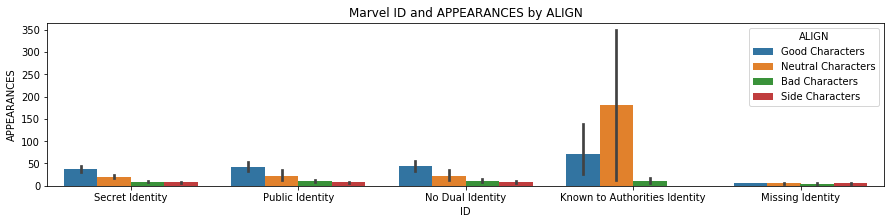

In [34]:
plt.subplots(figsize=(15,3))
sns.barplot(mcwikia1.ID,mcwikia1.APPEARANCES,hue=mcwikia1['ALIGN']).set_title('Marvel ID and APPEARANCES by ALIGN')

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text xticklabel objects>)

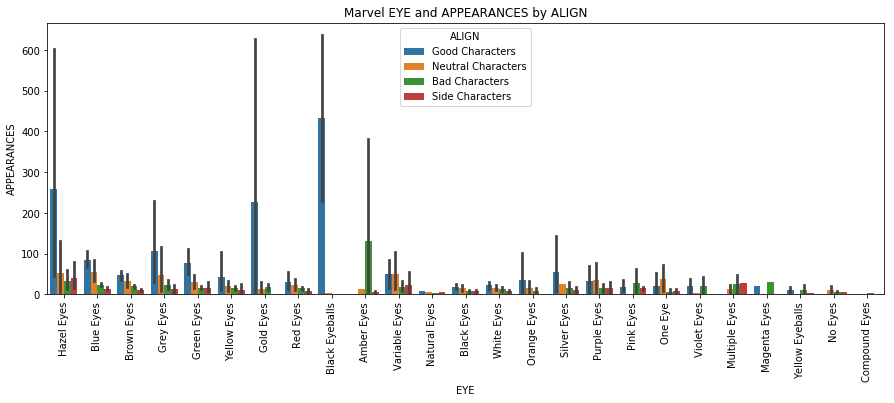

In [35]:
plt.subplots(figsize=(15,5))
sns.barplot(mcwikia1.EYE,mcwikia1.APPEARANCES,hue=mcwikia1['ALIGN']).set_title('Marvel EYE and APPEARANCES by ALIGN')
plt.xticks(rotation=90)

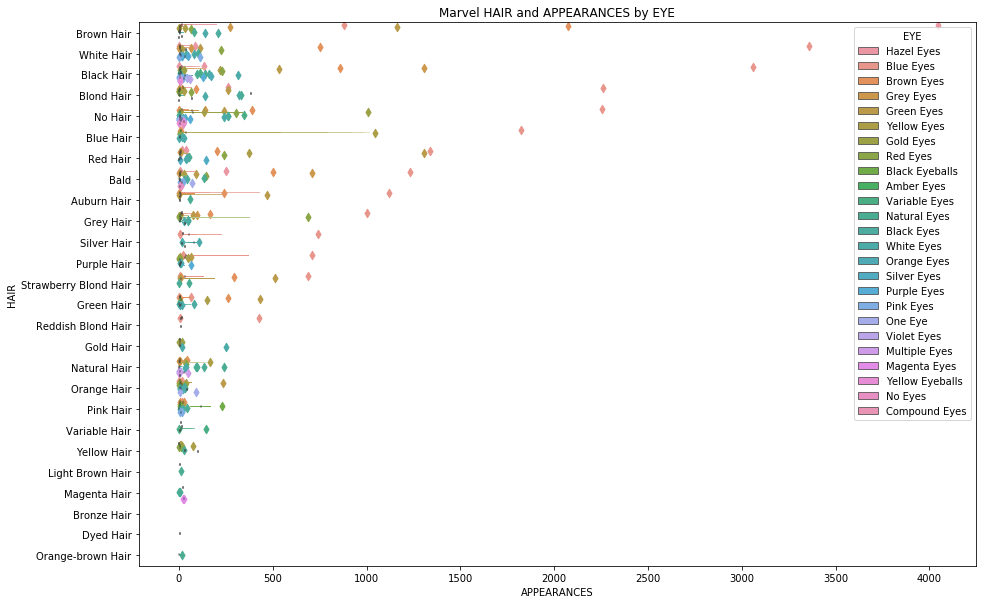

In [36]:
#sns.boxenplot(x="APPEARANCES", y="EYE",color="b", hue="HAIR",data=dcwikia1)
plt.subplots(figsize=(15,10))
sns.boxenplot(x="APPEARANCES", y="HAIR",data=mcwikia1,hue=mcwikia1['EYE']).set_title('Marvel HAIR and APPEARANCES by EYE')
plt.show()
#plt.savefig('d.jpg')

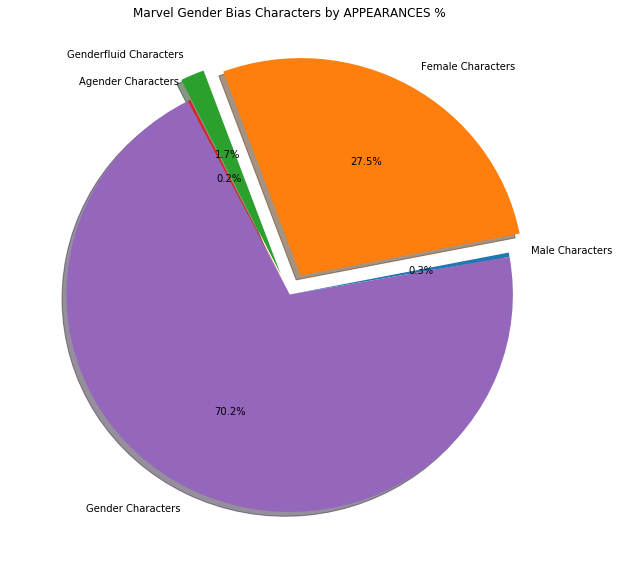

In [37]:
#plt.rc("font", size=10)
z1 = mcwikia1['SEX'].unique()
y1 = mcwikia1.groupby(['SEX'])['APPEARANCES'].sum().reset_index()
explode1 = (0, 0.1,0.1, 0, 0) 
#fig1,ax1=plt.subplots()
plt.figure(figsize=(10,10))
plt.pie(y1.APPEARANCES, labels=z1, explode= explode1,autopct='%1.1f%%', shadow=True, startangle=10)
plt.title('Marvel Gender Bias Characters by APPEARANCES %')
plt.show()

#plt.savefig('country.png')

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

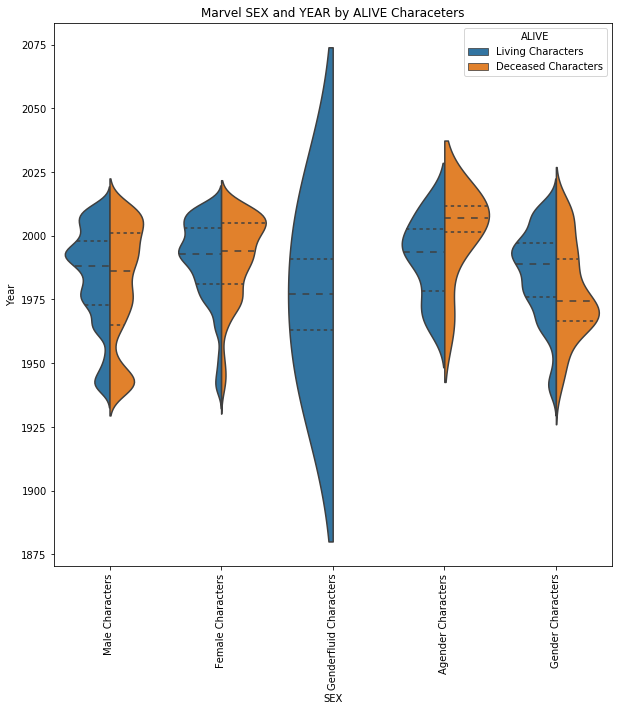

In [38]:
plt.figure(figsize=(10,10))
sns.violinplot(x="SEX", y="Year", hue=mcwikia1['ALIVE'],split=True, inner="quart",data=mcwikia1).set_title('Marvel SEX and YEAR by ALIVE Characeters')
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

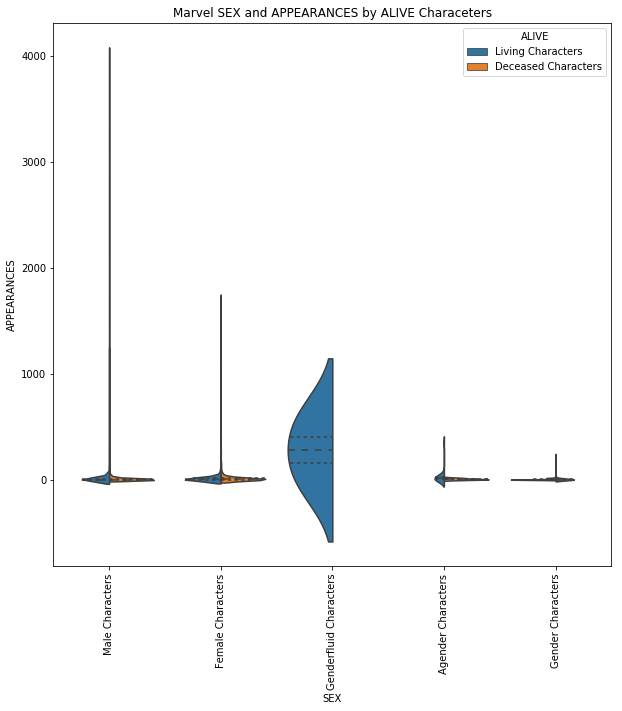

In [39]:
plt.figure(figsize=(10,10))
sns.violinplot(x="SEX", y="APPEARANCES", hue=mcwikia1['ALIVE'],split=True, inner="quart",data=mcwikia1).set_title('Marvel SEX and APPEARANCES by ALIVE Characeters')
plt.xticks(rotation=90)

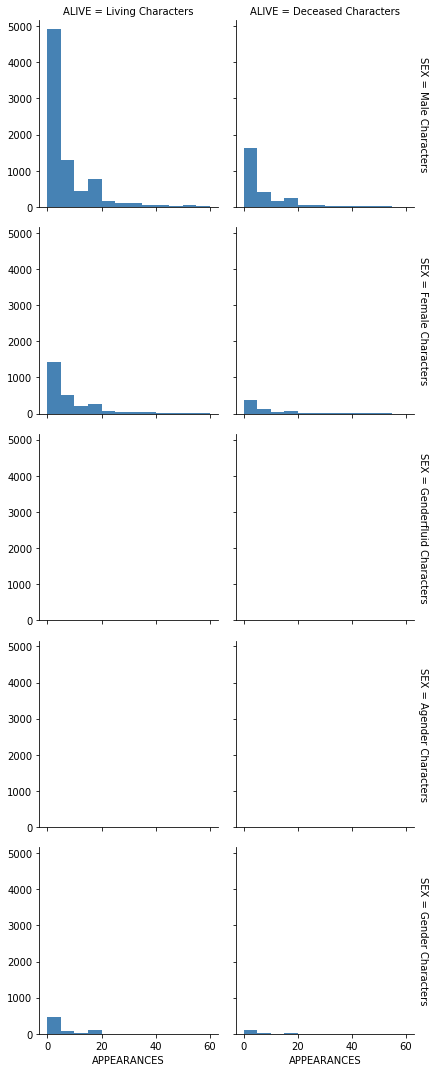

In [40]:
g = sns.FacetGrid(mcwikia1, row="SEX", col="ALIVE", margin_titles=True)
bins = np.linspace(0, 60, 13)
g.map(plt.hist, "APPEARANCES", color="steelblue", bins=bins)

Text(0.5,0.92,'Marvels Month,YEAR and APPEARANCES')

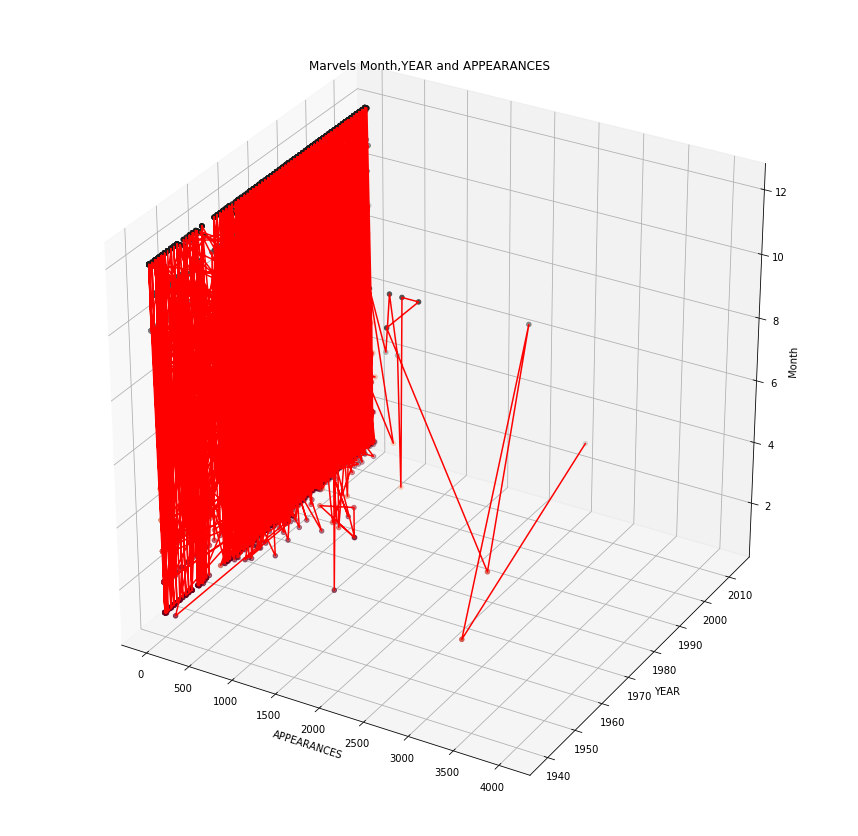

In [41]:
fig = plt.figure(figsize=(15,15))
ax = plt.axes(projection='3d')
xdata = mcwikia1['APPEARANCES']
ydata = mcwikia1['Year']
zdata = mcwikia1['Month']
ax.plot3D(xdata, ydata, zdata, 'red')
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='RdGy',);
ax.set_xlabel('APPEARANCES')
ax.set_ylabel('YEAR')
ax.set_zlabel('Month')
plt.title('Marvels Month,YEAR and APPEARANCES')